In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.svm import SVC



In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Data Cleaning

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see there are no missing items on the dataset, so we do not have to deal with the cleaning and processing the data.


In [ ]:
## EDA

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.select_dtypes(include=['object']).dtypes


Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


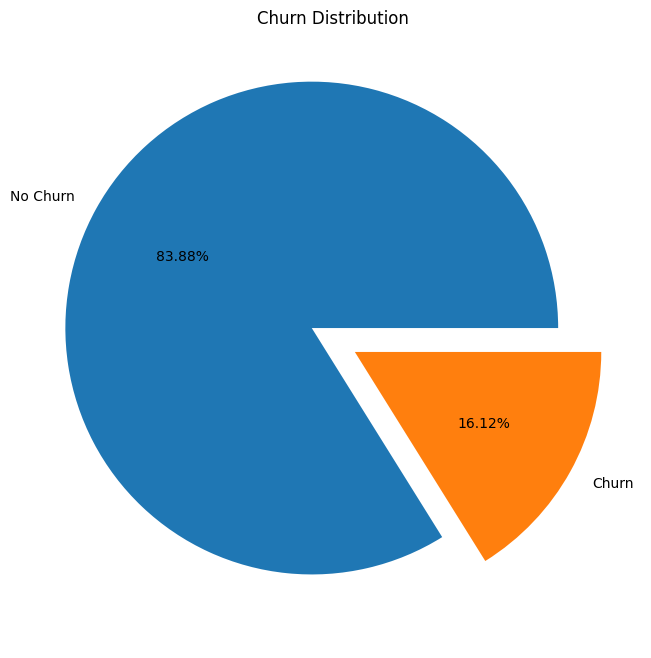

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Churn Distribution')
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No Churn', 'Churn'], autopct='%1.2f%%');

<ipython-input-12-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

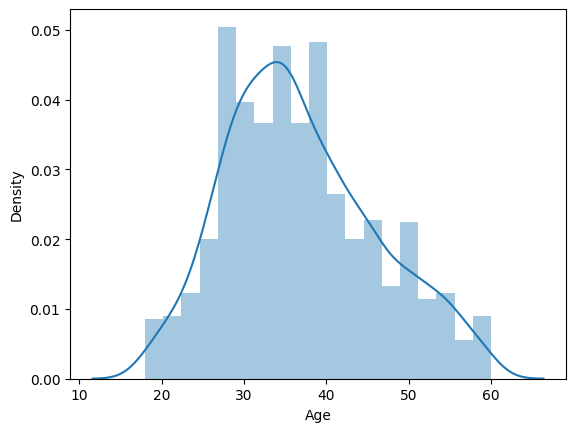

In [ ]:
sns.distplot(df["Age"])


<Axes: >

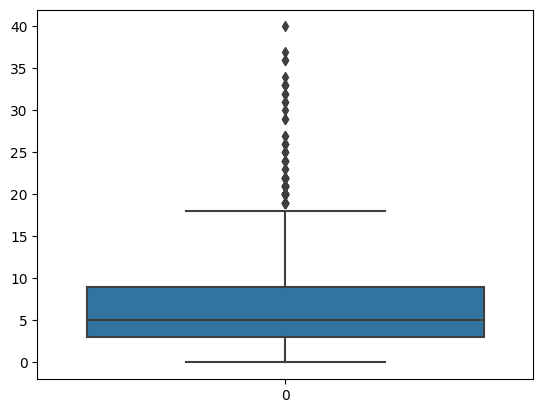

In [ ]:
sns.boxplot(df["YearsAtCompany"])


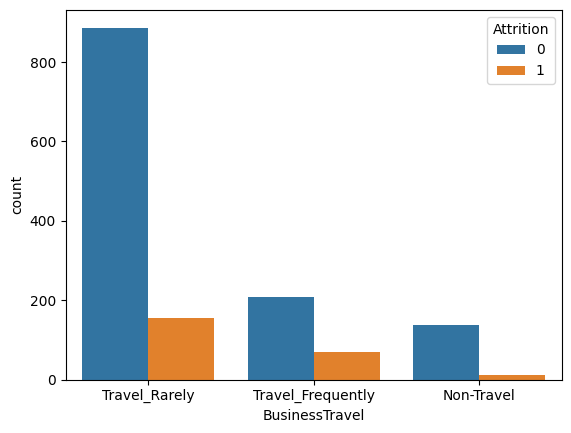

In [ ]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df);


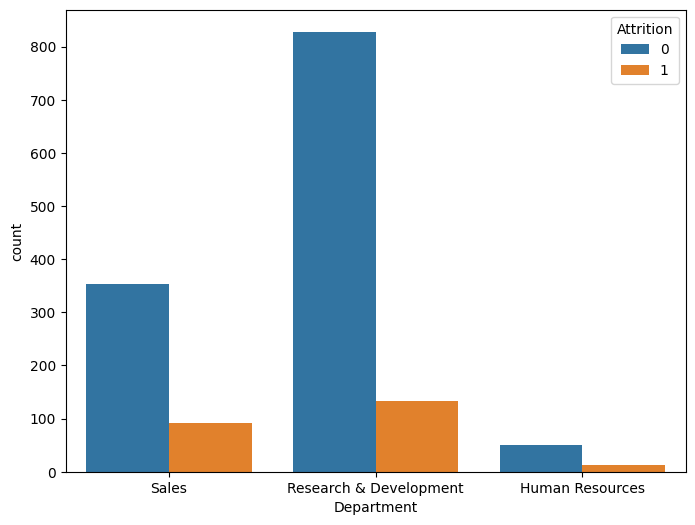

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=df);

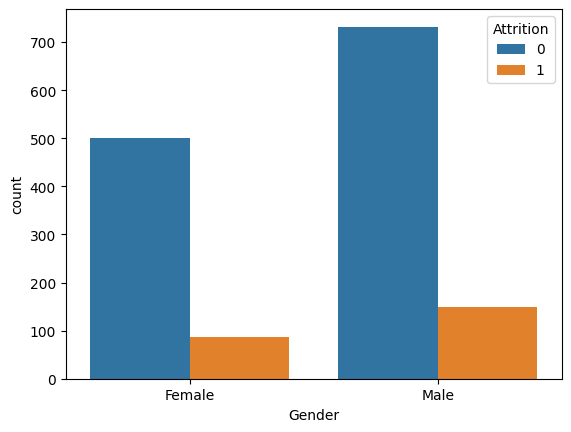

In [ ]:
sns.countplot(x='Gender', hue='Attrition', data=df);


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

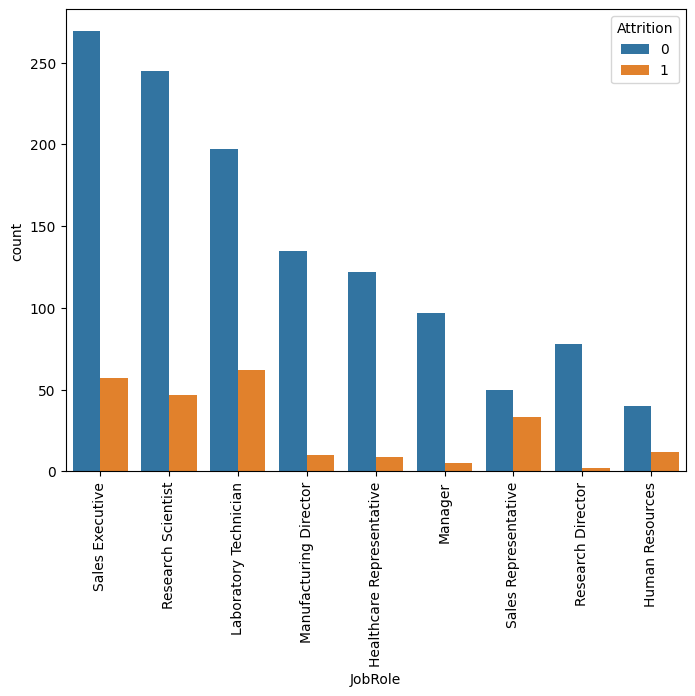

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=df);
plt.xticks(rotation=90)

In [ ]:
df.select_dtypes(include=['int64']).dtypes


Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

<ipython-input-19-89826d6202b3>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


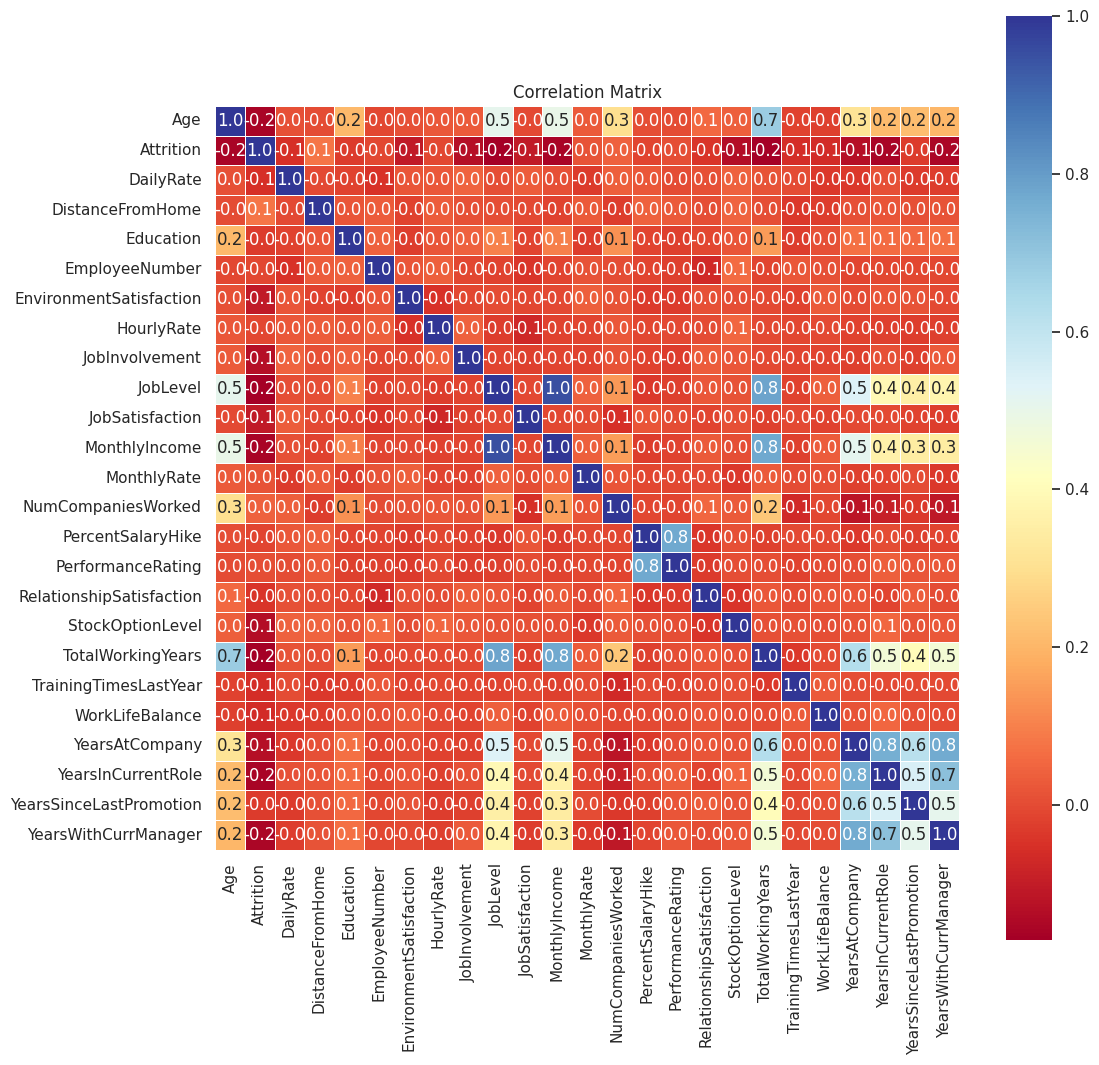

In [ ]:
# Heatmap for correlation analysis between the variables.
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)  # Drop columns with only one value

# Calculate the correlation matrix
corr = df.corr()

# Set the style to white background
sns.set(style="white")

# Create a figure with a specific size
plt.figure(figsize=(12, 12))

# Create the heatmap with customizations
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, cmap='RdYlBu', linewidths=.5)

plt.title('Correlation Matrix')

plt.show()


Senior employees tend to accumulate more total working years, which is a clear trend.

An increase in performance ratings is associated with a higher percentage of salary hike.

Monthly income tends to rise with the number of years an employee has been with the company.

Many employees stay in their current roles and under the same manager over the years, indicating a lack of promotions, which could be a significant factor contributing to attrition.

In [ ]:
#DATA MANIPULATION

In [ ]:
# Separating the features from the target (In the process, we will drop features because they look not like the key factors against churn.)
X = df.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # Features
y = df['Attrition'] # Target

In [ ]:
# Label encoding the categorical variables

columns_to_encode = ['Department', 'Education', 'JobRole', 'Gender', 'MaritalStatus', 'Over18']

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [ ]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [ ]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [ ]:
###
# BUILDING MODELS
###

In [ ]:
# Define ML models
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Logistic Regression", LogisticRegression(solver='liblinear')),
    ("XGBoost", xgb.XGBClassifier()),
    ("Support Vector Machine", SVC())
]

# Number of folds for cross-validation
n_folds = 5
results = []

# Iterate through each model
for name, model in models:
    # Initialize KFold cross-validation
    kfold = model_selection.KFold(n_splits=n_folds)

    # Evaluate the model using cross-validation
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted")

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Generate predictions on training and testing data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate additional metrics
    precision = precision_score(y_test, test_predictions, average='weighted')
    recall = recall_score(y_test, test_predictions, average='weighted')
    f1 = f1_score(y_test, test_predictions, average='weighted')

    # Display evaluation metrics
    print(f"Model: {name}\n")
    print(f"Training Accuracy: {accuracy_score(train_predictions, y_train):.4f}, Testing Accuracy: {accuracy_score(test_predictions, y_test):.4f}")
    print(f"Cross-Validation Mean: {cv_results.mean():.4f}")
    print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")

Model: Random Forest

Training Accuracy: 1.0000, Testing Accuracy: 0.8526
Cross-Validation Mean: 0.7988
Precision: 0.8341
Recall: 0.8526
F1 Score: 0.8085

Model: Logistic Regression

Training Accuracy: 0.8688, Testing Accuracy: 0.8549
Cross-Validation Mean: 0.8292
Precision: 0.8316
Recall: 0.8549
F1 Score: 0.8222

Model: XGBoost

Training Accuracy: 1.0000, Testing Accuracy: 0.8526
Cross-Validation Mean: 0.8275
Precision: 0.8274
Recall: 0.8526
F1 Score: 0.8266

Model: Support Vector Machine

Training Accuracy: 0.8814, Testing Accuracy: 0.8481
Cross-Validation Mean: 0.7795
Precision: 0.8338
Recall: 0.8481
F1 Score: 0.7935



In [ ]:
# Create a PrettyTable object
table = PrettyTable()

# Define table columns
table.field_names = ["Model", "Training Accuracy", "Testing Accuracy", "Cross-Validation Mean", "Precision", "Recall", "F1 Score"]

# Add data rows
table.add_row(["Random Forest", "1.0000", "0.8458", "0.8012", "0.8166", "0.8458", "0.7952"])
table.add_row(["Logistic Regression", "0.8688", "0.8549", "0.8292", "0.8316", "0.8549", "0.8222"])
table.add_row(["XGBoost", "1.0000", "0.8526", "0.8275", "0.8274", "0.8526", "0.8266"])
table.add_row(["Support Vector Machine", "0.8814", "0.8481", "0.7795", "0.8338", "0.8481", "0.7935"])


# Print the table
print(table)

+------------------------+-------------------+------------------+-----------------------+-----------+--------+----------+
|         Model          | Training Accuracy | Testing Accuracy | Cross-Validation Mean | Precision | Recall | F1 Score |
+------------------------+-------------------+------------------+-----------------------+-----------+--------+----------+
|     Random Forest      |       1.0000      |      0.8458      |         0.8012        |   0.8166  | 0.8458 |  0.7952  |
|  Logistic Regression   |       0.8688      |      0.8549      |         0.8292        |   0.8316  | 0.8549 |  0.8222  |
|        XGBoost         |       1.0000      |      0.8526      |         0.8275        |   0.8274  | 0.8526 |  0.8266  |
| Support Vector Machine |       0.8814      |      0.8481      |         0.7795        |   0.8338  | 0.8481 |  0.7935  |
+------------------------+-------------------+------------------+-----------------------+-----------+--------+----------+
